<a href="https://colab.research.google.com/github/codeForX/Perplexity_benchmark/blob/main/Analyzing_perplexity_results_LLaMa_2_13b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing perplexity results on **LLaMa 2 13b**

*Using the **perplexity** metric on a combination of the original and paraphrased texts to detect if the original was in the dataset.*

## The Idea
Create an offshoot of the DeCop benchmark that doesn't require instruction-tuned models, that could theoretically use an infinite amount of alternative texts, and is more transparent about how the model is guessing (you could look at perplexity scores, the model is providing the perplexity scores).

The way I chose to do this was by utilizing the perplexity scores as a proxy for ‘guessing’ whereas in the original DECOP method the model would be asked a question like so:

```
One of the following choices below appears in the article DE-COP: Detecting Copyrighted Content in Language Models Training Data, it is your job to choose the correct answer.
	[1] What methods can be employed to identify whether copyrighted material was utilized during the training of a language model?
	[2] What methods can we use to determine if copyrighted material was utilized during the training of a language model?
	[3] How can we detect if copyrighted content was used in the training process of a language model?
	[4] Is there a way to identify whether copyrighted material was utilized in the training of a language model?
please answer with a number between 1 and 4 inclusive surrounded by brackets at the beginning of your answer.

```
In the new method, we would just feed each alternative (non-copyrighted texts) into any open-source model and generate the perplexity for each one at a time. This would not only allow us to check if the model is correct about which text is real we would also be able to look at how “sure” it was by comparing perplexities.
## Pros and Cons
#### Pros:
- More easily extensible without having to worry about the model losing track of instruction
- Doesn't require the model to be instruction finetuned
- Would be hard to finetune the model to hide perplexity (TBC)
- Gives more information than just what was ‘chosen’ (provides perplexity score)
- Based on initial testing the model could ‘guess’ the correct answer with a high probability at 4 options all from Claude even if it was impossible that it saw it in training but this is possible to fix using more and verified  options
- If extended past 4 options has a lower false positive rate than decop
### Cons:
- Only works on opensource models


# loading datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/results_llama_2_13b_11_choices.csv')

post2022 = df[df['label'] == 'post2022']
pre2022 = df[df['label'] == 'pre2022']


In [ ]:
import json
def generate_stats(df):
  perplexity_scores = df['perplexity_scores'].apply(json.loads)
  labels = 'Snippet,Claude-2,gpt-3.5-turbo,qwen-2-7b-instruct,openchat-8b,mistral-7b-instruct-v0.3,llama-3-8b-instruct,phi-3-medium-128k-instruct,gpt-4o-mini,olmo-7b-instruct,wizardlm-2-7b'.split(',')
  df = pd.DataFrame(
      {
          'Snippet': perplexity_scores.apply(lambda x: x[0]),
          'Claude-2': perplexity_scores.apply(lambda x: x[1]),
          'gpt-3.5-turbo': perplexity_scores.apply(lambda x: x[2]),
          'qwen-2-7b-instruct': perplexity_scores.apply(lambda x: x[3]),
          'openchat-8b': perplexity_scores.apply(lambda x: x[4]),
          'mistral-7b-instruct-v0.3': perplexity_scores.apply(lambda x: x[5]),
          'llama-3-8b-instruct': perplexity_scores.apply(lambda x: x[6]),
          'phi-3-medium-128k-instruct': perplexity_scores.apply(lambda x: x[7]),
          'gpt-4o-mini': perplexity_scores.apply(lambda x: x[8]),
          'olmo-7b-instruct': perplexity_scores.apply(lambda x: x[9]),
          'wizardlm-2-7b': perplexity_scores.apply(lambda x: x[10]),

      }
  )
  return df






In [ ]:
stats_pre2022 = generate_stats(pre2022)
stats_pre2022

,Snippet,Claude-2,gpt-3.5-turbo,qwen-2-7b-instruct,openchat-8b,mistral-7b-instruct-v0.3,llama-3-8b-instruct,phi-3-medium-128k-instruct,gpt-4o-mini,olmo-7b-instruct,wizardlm-2-7b
0,7.100387,22.466766,19.410175,23.723373,14.395819,18.063370,17.470924,24.827484,22.801504,31.793659,19.111927
1,9.324815,14.087435,10.762723,18.911283,12.495051,16.208496,11.208661,11.839428,10.581647,14.084207,12.410416
2,12.626627,12.700474,14.132752,13.935057,13.010718,18.028748,23.487669,14.138377,12.086605,26.993404,11.576376
3,12.443947,13.326583,8.918230,11.306458,9.801746,13.439360,12.367701,18.344305,13.576185,16.270084,15.795557
4,19.073917,13.985699,19.431484,28.778002,20.937445,17.647308,16.300770,24.738646,16.755447,18.797823,12.357942
...,...,...,...,...,...,...,...,...,...,...,...
295,9.761406,10.598721,13.409031,11.061676,10.826245,12.121652,11.168158,13.002441,10.008031,11.081190,11.457091
296,15.177423,9.304151,16.311205,26.698799,23.924309,26.560968,19.719725,20.101572,18.383863,26.480944,23.200535
297,8.035655,9.292771,12.572943,17.831148,13.749499,18.541767,12.580400,17.179476,10.869102,12.761654,10.773673
298,12.912767,16.434734,16.546144,15.267052,14.072379,13.454213,11.980364,14.383675,13.960893,20.391121,7.845932


In [ ]:
stats_post2022 = generate_stats(post2022)
stats_post2022

,Snippet,Claude-2,gpt-3.5-turbo,qwen-2-7b-instruct,openchat-8b,mistral-7b-instruct-v0.3,llama-3-8b-instruct,phi-3-medium-128k-instruct,gpt-4o-mini,olmo-7b-instruct,wizardlm-2-7b
300,7.704797,17.310295,9.032929,8.328315,10.322799,7.354211,7.495666,10.160619,7.989366,9.913232,8.485033
301,21.045036,31.905437,11.752091,38.286953,11.726904,41.956726,23.867996,33.216602,21.967216,20.303106,18.435106
302,17.003794,17.784573,14.230830,12.968661,11.336908,13.232601,11.919772,16.196058,10.861354,21.817547,9.527280
303,9.614389,9.327828,9.837119,11.649249,7.930415,10.526051,8.931538,12.976489,8.001686,9.388934,10.518370
304,27.060213,19.301842,33.253323,30.561386,19.944050,28.817274,23.192587,26.495310,21.410646,45.901566,27.731346
...,...,...,...,...,...,...,...,...,...,...,...
594,14.646023,19.628098,11.934810,17.935589,15.028162,18.088732,12.831426,18.957655,12.538699,15.937679,14.708241
595,9.668083,15.199608,7.366160,13.389333,9.793309,9.349960,8.836099,11.912274,9.593738,9.900369,8.831534
596,12.111384,6.788877,12.413340,13.429366,11.907172,13.878658,10.886260,18.870911,10.030352,14.786740,13.641914
597,13.016207,14.184143,15.638239,15.747854,14.761653,18.604984,10.817963,18.651564,13.306362,15.949683,11.583955


# Graphs

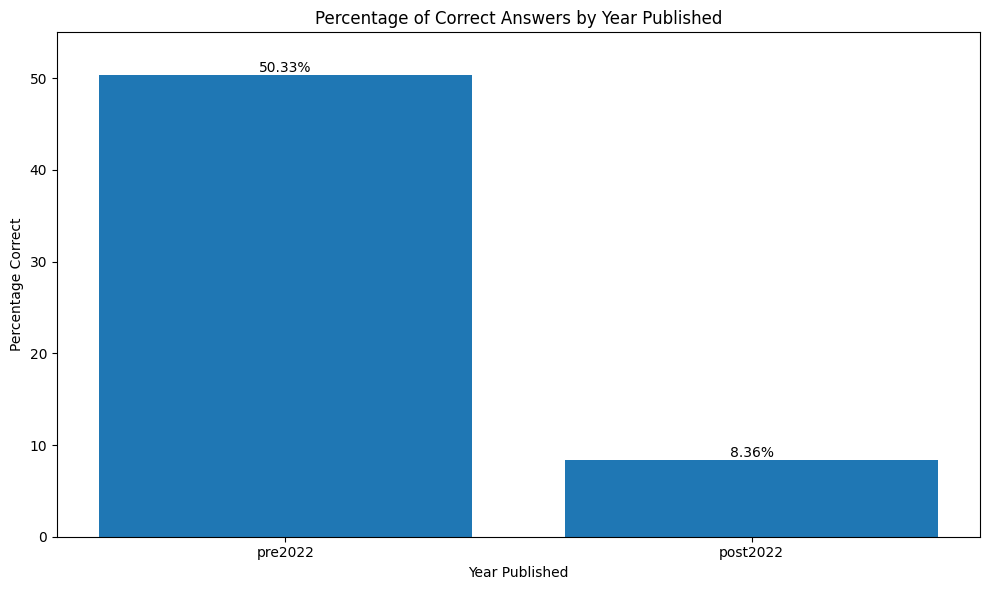

In [ ]:
#@title ## Percentage of Correct Answers by Year Published
#@markdown X axis:

#@markdown - The pubilcation year of the data

#@markdown Y axis

#@markdown - The amount of correctly guessed by finding minimum perplexity out of alternate options where one is real and it has minimum perplexity ( least confusion, most likely in the dataset).



# Group the data by label and calculate the percentage of correct answers
grouped = df.groupby('label')['correct'].mean() * 100


grouped =grouped.iloc[::-1]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(grouped.index, grouped.values)

# Add labels and title
ax.set_xlabel('Year Published')
ax.set_ylabel('Percentage Correct')
ax.set_title('Percentage of Correct Answers by Year Published')

# Set y-axis limit to 100
ax.set_ylim(0, 55)

# Add percentage values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


**Note**: model tested on 11 generated choices from a variety of models with one answer not generated by AI, comparing perplexity scores, where percentage correct is defined as the lowest perplexity matching the original text.

 N (post-2022): 299; N (pre-2022): 300

Pre2022 the model has a high chance of picking the right answer out of 11 choices, post 2022 we get basically random chance; suggesting that the model wasn't trained on data post 2022 exclusive. (25 cents per 1000)

## Minimum value percentages
These graphs messure the amount of times each model and the original text (Snippet) had the least perplexity. Since as of now the models texts are judged first past the post this is a important metric.

X axis:

- The model the winning text (or the text with the perplexity) was generated by (Snippet is the original text, was not altered by any model)

Y axis

- The percentage of times the model's or original text (Snippet) was chosen because it had the least perplexity




 The perplexity score might be influenced by the style and information

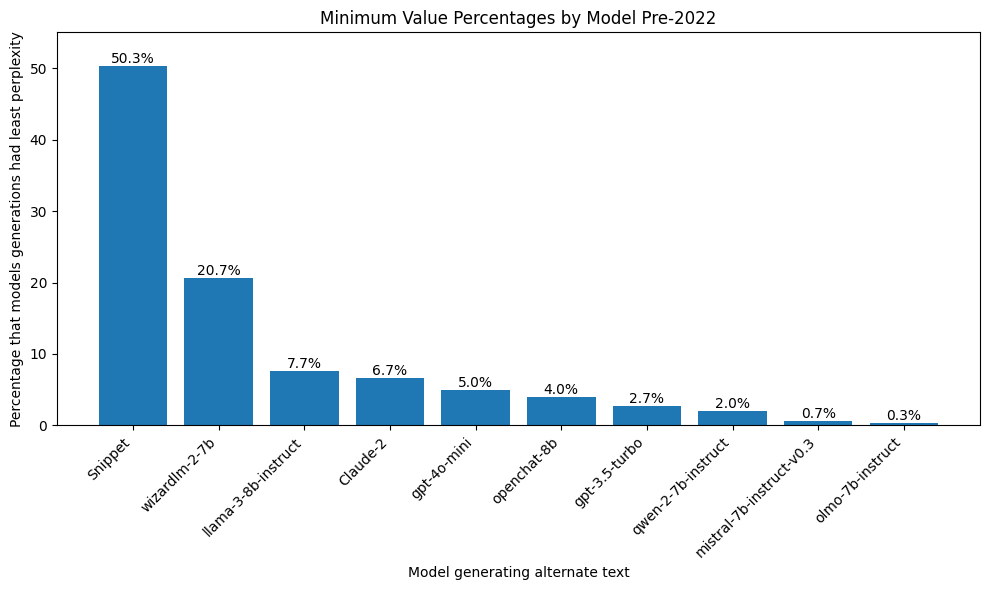

In [ ]:
#@title Minimum Value Percentages by Model Pre-2022

# Find the column with the minimum value for each row
min_columns = stats_pre2022.idxmin(axis=1)

# Count the occurrences of each column as the minimum
min_counts = min_columns.value_counts()

# Calculate percentages
total_rows = len(stats_pre2022)
percentages = (min_counts / total_rows) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(percentages.index, percentages.values)
plt.xlabel('Model generating alternate text')
plt.ylabel('Percentage that models generations had least perplexity')
plt.title('Minimum Value Percentages by Model Pre-2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylim(0, 55)  # Set y-axis limit to 0-100%
plt.yticks(range(0, 55, 10))  # Set y-axis ticks from 0 to 100 by 10

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


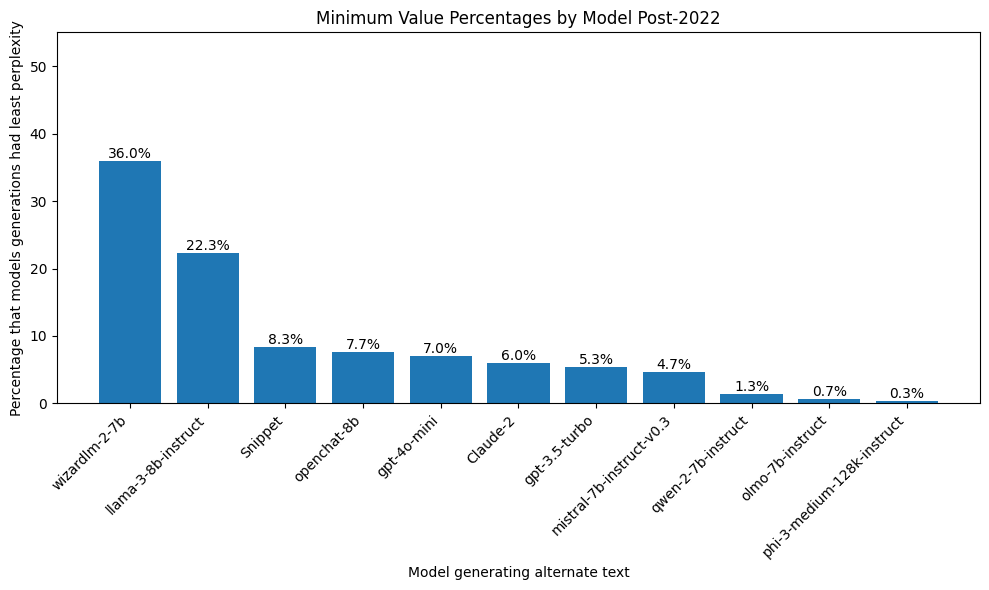

In [ ]:
#@title Minimum Value Percentages by Model Post-2022

# Find the column with the minimum value for each row
min_columns = stats_post2022.idxmin(axis=1)

# Count the occurrences of each column as the minimum
min_counts = min_columns.value_counts()

# Calculate percentages
total_rows = len(stats_pre2022)
percentages = (min_counts / total_rows) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(percentages.index, percentages.values)
plt.xlabel('Model generating alternate text')
plt.ylabel('Percentage that models generations had least perplexity')
plt.title('Minimum Value Percentages by Model Post-2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylim(0, 55)  # Set y-axis limit to 0-100%
plt.yticks(range(0, 55, 10))  # Set y-axis ticks from 0 to 100 by 10

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Note: Each round, llama was asked to generate perplexity scores for each similar texts for a given copyrighted (primary) snippet text. In each round, each option of text was generated by a different model. For example, option 1 ws generated by Claude-2, option 2 by a different LLM, etc. This graph tests if Llama favoured one model-generated text over another. LLama was least confused (purely based on the count of times it was chosen from all the options) by WizerdLM-2-7b.

The perplexity score might be influenced by the style and information


## Mean Perplexity Scores for Different Models
These graphs messure the mean perplexity for each models generations

X axis:

- Either the model the text was generated by or 'Snippet' if the text was the original

Y axis

- The mean perplexity for the model or 'Snippet' if the text was the original




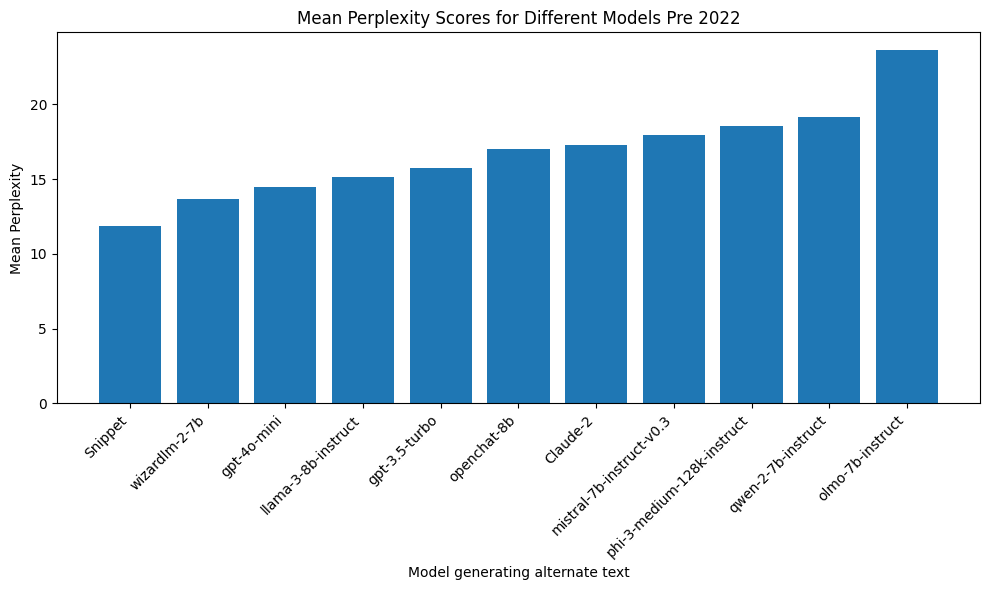

In [ ]:
#@title Mean Perplexity Scores for Different Models pre-2022

# Calculate mean perplexity for each model
means = stats_pre2022.mean()
means = means.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
# Create a bar plot
plt.bar(means.index, means.values)
plt.xlabel('Model generating alternate text')
plt.ylabel('Mean Perplexity')
plt.title('Mean Perplexity Scores for Different Models Pre 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


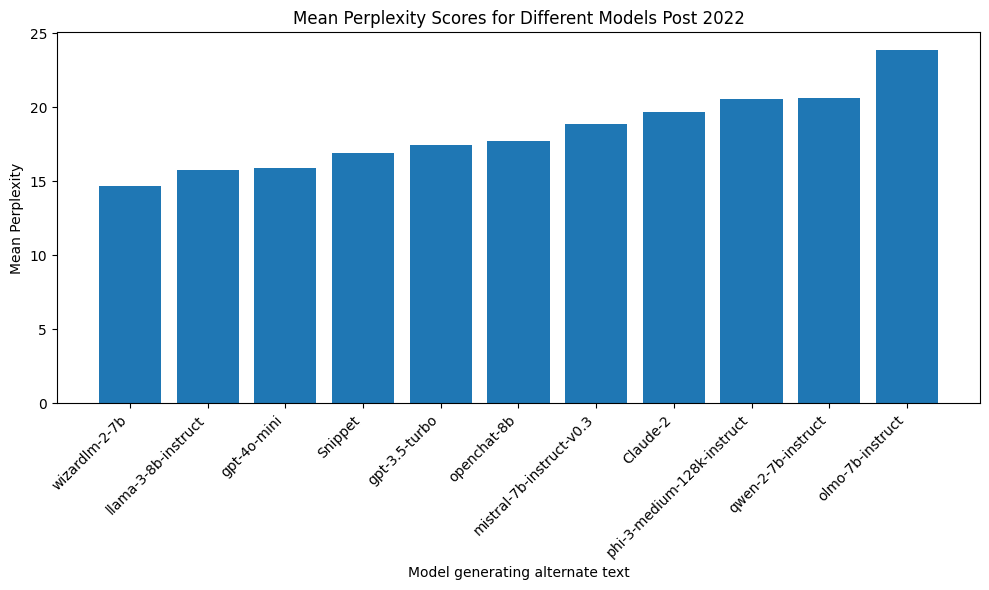

In [ ]:
#@title Mean Perplexity Scores for Different Models Post 2022


# prompt: Using dataframe stats: a plot showing the difrent mean perplextiy scores from the difrent answers

import matplotlib.pyplot as plt
import numpy as np

# Calculate mean perplexity for each model
means = stats_post2022.mean()
means = means.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(means.index, means.values)
plt.xlabel('Model generating alternate text')
plt.ylabel('Mean Perplexity')
plt.title('Mean Perplexity Scores for Different Models Post 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## Standard Deviation of Perplexity Scores for Different Model generations

These graphs messure the standard deviation perplexity for each models generations

X axis:

- Either the model the text was generated by or 'Snippet' if the text was the original

Y axis

- The standard deviation perplexity for the model or 'Snippet' if the text was the original



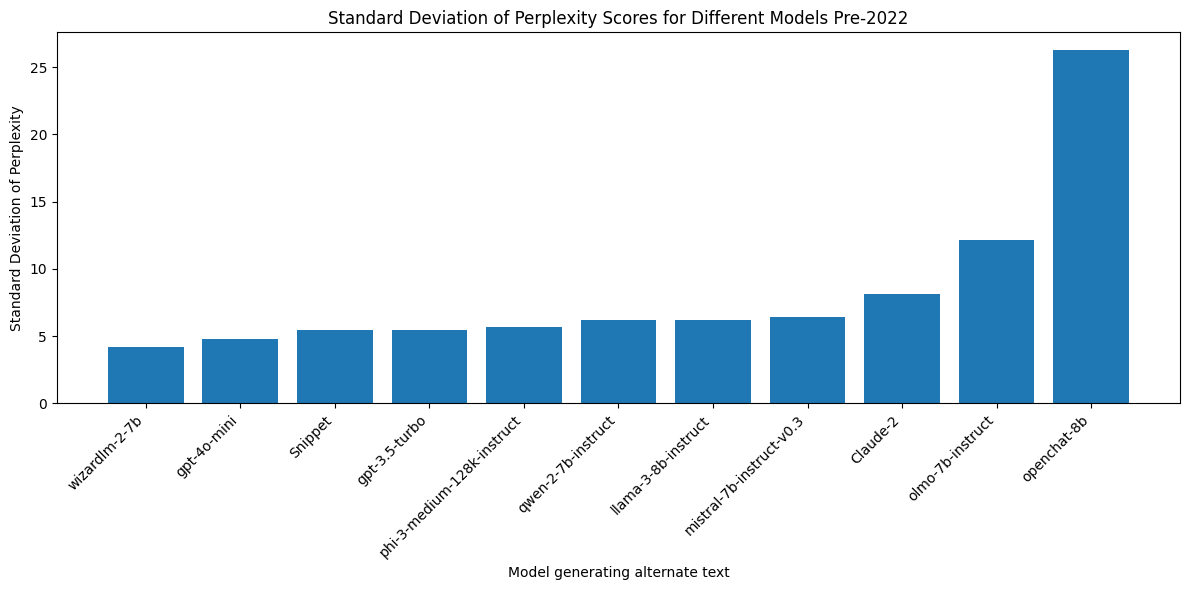

In [ ]:
#@title Standard Deviation of Perplexity Scores for Different Models Pre-2022

import matplotlib.pyplot as plt
import numpy as np

# Calculate standard deviation of perplexity for each model
stds = stats_pre2022.std()
stds = stds.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
plt.bar(stds.index, stds.values)
plt.xlabel('Model generating alternate text')
plt.ylabel('Standard Deviation of Perplexity')
plt.title('Standard Deviation of Perplexity Scores for Different Models Pre-2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


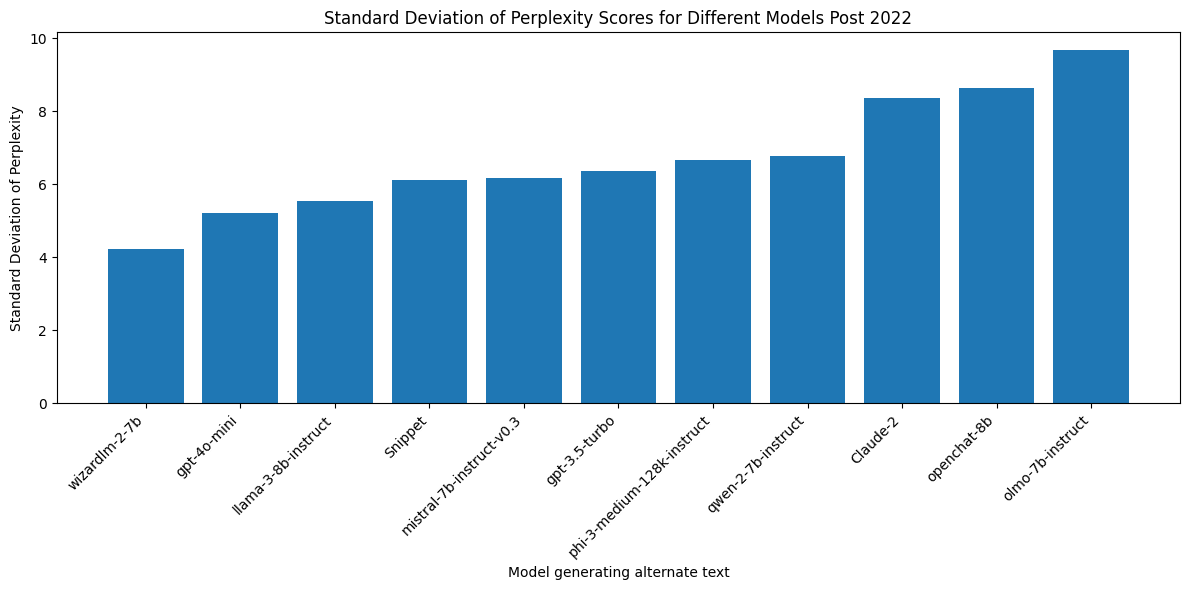

In [ ]:
#@title Standard Deviation of Perplexity Scores for Different Models Post-2022


import matplotlib.pyplot as plt
import numpy as np

# Calculate standard deviation of perplexity for each model
stds = stats_post2022.std()
stds = stds.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
plt.bar(stds.index, stds.values)
plt.xlabel('Model generating alternate text')
plt.ylabel('Standard Deviation of Perplexity')
plt.title('Standard Deviation of Perplexity Scores for Different Models Post 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
